
# <h1 style="color:blue;" align="center"><u> Customer Attrition Analysis</u></h1>
![Customer Attrition Analysis](https://www.viquepedia.com/assets/images/sitelogo/customer-churn-1024x662.jpg)
## Contents

* [What is Customer Attrition Analysis](#What-is-Customer-Attrition-Analysis)

* [About the Company](#About-the-Company)

* [Business Issue](#Business-Issue)

* [Goal](#Goal)

* [Loading Libraries](#Loading-Libraries)

* [Loading Data](#Loading-Data)

* [Data Analysis](#Data-Analysis)

* [Visualization and Suggestions](#Visualization-and-Suggestions)

* [Feature Selection](#Feature-Selection)

* [Splitting the dataset](#Splitting-the-dataset)

* [Scaling](#Scaling)

* [Classification machine learning models](#Classification-machine-learning-models)

> * [Logistic Regression](#Logistic-Regression)
> * [Decision Tree](#Decision-Tree)
> * [Random Forest](#Random-Forest)
> * [Support Vector](#Support-Vector)
> * [KNN](#KNN)
> * [Summary](#Summary)

## What is Customer Attrition Analysis

Customer attrition analysis, also known as customer churn analysis, involves examining the factors that contribute to the loss of customers or clients from a business. The goal is to understand why customers are leaving and to develop strategies to prevent customer attrition. 

## About the Company

Verizonet, a telecommunications company based in California, has been operating for six years,providing phone and internet services to customers across more than a thousand cities and zip
codes.

## Business Issue

At the end of the last quarter, only 43% of newly acquired customers chose to continue their services, resulting in a decrease in the total customer base. Despite a highly skilled sales team successfully attracting new clients, the company faces a
significant challenge: a high customer attrition rate.

## Goal

Our primary objectives are to analyze the dataset, identify factors driving
customer turnover, develop an accurate Machine Learning model to predict potential departures,
and recommend customized retention strategies. The company aims to save costs by retaining
customers, as acquiring new clients is significantly more expensive.Verizonet's executives are
optimistic that the insights and actions derived from this project will not only reduce attrition but
also contribute to the company's growth and financial stability.

# Let's Start

## Loading Libraries

Here I imported several essential libraries and modules for data analysis and machine learning in Python. 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,f1_score,balanced_accuracy_score,confusion_matrix

from sklearn.model_selection import GridSearchCV


## Loading Data

Here I loaded a CSV file named 'verizonet_data.csv' into a DataFrame called 'df' using the Pandas library. The sample(10) method is then used to display a random sample of 5 rows from the DataFrame, and .T is used to transpose the DataFrame for better readability. 

In [2]:
df=pd.read_csv('E:\\ML\\Capstone_project\\verizonet_data.csv')
df.sample(5).T

,1809,4270,2429,6143,1796
Customer ID,4585-HETAI,1942-OQFRW,0220-EBGCE,9932-WBWIK,1513-XNPPH
Referred a Friend,Yes,No,No,No,No
Number of Referrals,5,0,0,0,0
Tenure in Months,4,1,2,11,12
Offer,NaN,Offer E,Offer E,Offer D,Offer D
Phone Service,Yes,Yes,Yes,Yes,Yes
Avg Monthly Long Distance Charges,48.48,13.4,14.14,47.88,17.46
Multiple Lines,No,No,No,No,No
Internet Service,Yes,Yes,Yes,No,Yes
Internet Type,Cable,Fiber Optic,Fiber Optic,NaN,Cable


## Data Analysis

The df.info() method provides a summary of a Pandas DataFrame, including information about the data types, non-null values. This information can be helpful for identifying missing values (Non-Null Count less than the total number of entries), understanding data types, and getting a quick overview of your dataset's structure.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [4]:
df.shape

(7043, 43)

The df.shape attribute returns a tuple representing the dimensions of the DataFrame.This indicates that the DataFrame df has 7043 rows and 43 columns. The number of rows corresponds to the length of the DataFrame (the number of observations or samples), and the number of columns corresponds to the features or variables in the DataFrame.

In [5]:
df.size

302849

The df.size attribute returns the total number of elements in the DataFrame, which is equal to the product of the number of rows and columns. It provides the overall count of elements in the DataFrame, including both data and potential missing values. 
Here it indicates that the DataFrame 'df' has a total of 3,02,849 elements.

In [6]:
obj_count=int_count=float_count=0
for i in df.columns:
    if df[i].dtype==object:
        obj_count+=1
    elif df[i].dtype=='int64':
        int_count+=1
    else:
        float_count+=1
print("No. of columns with dataype 'object' is",obj_count)
print("No. of columns with dataype 'int' is",int_count)
print("No. of columns with dataype 'float' is",float_count)

No. of columns with dataype 'object' is 26
No. of columns with dataype 'int' is 10
No. of columns with dataype 'float' is 7


In [7]:
df[df.duplicated()]

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate


This code returns a DataFrame containing all the rows that have identical values in all columns. If there are no duplicates, the result will be an empty DataFrame.
Here you can see an empty dataframe that means no duplicates found here.

Here I am  printing the unique values and the count of unique values for each column in your DataFrame. This is a useful approach to get an overview of the diversity and distribution of values in each column.

In [8]:
for i in df.columns:
   print(i,"-",len(df[i].unique()))
   print("Unique values :",df[i].unique())
   print("\n")

Customer ID - 7043
Unique values : ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']


Referred a Friend - 2
Unique values : ['No' 'Yes']


Number of Referrals - 12
Unique values : [ 0  1  6  2  4  3  7  5  8  9 10 11]


Tenure in Months - 72
Unique values : [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]


Offer - 6
Unique values : [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']


Phone Service - 2
Unique values : ['No' 'Yes']


Avg Monthly Long Distance Charges - 3584
Unique values : [ 0.   48.85 11.33 ... 44.99 44.98  8.62]


Multiple Lines - 2
Unique values : ['No' 'Yes']


Internet Service - 2
Unique values : ['Yes' 'No']


Internet Type - 4
Unique values : ['Fiber Optic' 'Cable' 'DSL' nan]


Avg Monthly GB Download - 63
Unique values : [ 9 19 57 13 15 20 33 26 21 32 31

In this analysis, the target feature is "Churn Status," which is a categorical column with binary values (0 and 1). The nature of this target variable indicates that the problem is a binary classification task. The goal is to predict whether a given instance represents a case of churn (1) or non-churn (0). 


In [9]:
df.drop(columns='Customer ID',inplace=True)

Dropping 'Customer ID' with 7043 unique values, here this is more like a unique identifier for each row and does not carry meaningful information for the prediction task.Using the index as an identifier in place of a column like 'Customer ID' can indeed be a reasonable alternative, especially if the index serves as a unique identifier for each row in your dataset.

# Missing Values

In [10]:
for i in df.columns:
    null_count = df[i].isna().sum()
    if null_count>0:
        print("No. of null values in the column '{}' = {}".format(i,null_count))

No. of null values in the column 'Offer' = 3877
No. of null values in the column 'Internet Type' = 1526
No. of null values in the column 'Churn Category' = 5174
No. of null values in the column 'Churn Reason' = 5174
No. of null values in the column 'Customer Satisfaction rate' = 5209


This code is checking for null (missing) values in each column of your DataFrame (df) and printing the number of null values for columns where there are any. This is a good practice for identifying and handling missing data.

In [11]:
df[df["Churn Category"].isnull()]["Churn Status"].value_counts()

Churn Status
0    5174
Name: count, dtype: int64

In [12]:
df[df["Churn Reason"].isnull()]["Churn Status"].value_counts()

Churn Status
0    5174
Name: count, dtype: int64

In [13]:
df[df["Internet Type"].isnull()]["Internet Service"].value_counts()

Internet Service
No    1526
Name: count, dtype: int64

In our dataset, the "Customer Satisfaction rate" column contains a significant number of missing values, comprising around 74% of the total entries. Given the high percentage of missing data, applying imputation to estimate these values may pose challenges and might not accurately reflect the actual distribution of satisfaction rates.Imputation is a statistical technique employed to replace missing values with estimated values.Common methods for imputation include replacing missing values with the mean, median, or mode.Imputation is particularly useful when missing data is not completely random, and there is a pattern or structure to the missing values.

Here  the missing values in the "Customer Satisfaction rate" column appear to be completely random, one reasonable approach is to consider dropping the column. The randomness implies that there's no pattern or specific cause for the missing data, making imputation less necessary. 

In [14]:
df.drop(columns='Customer Satisfaction rate',inplace=True)

fillna() will replace missing values in the specified columns with the values you've provided in the dictionary

In [15]:
df.fillna(value={"Churn Category":"No churn",
                 "Churn Reason":"No churn",
                 "Internet Type":"Not opted",
                 "Offer":"No offer"},inplace=True)


This code will display the number of null values in each column after filling the missing values with the specified values.If everything worked correctly, you should see zeros for the columns you filled.

In [16]:
df.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charg

In [17]:
df_org=df.copy()

This line creates a new DataFrame 'df_org' that is a deep copy of the original DataFrame 'df'. A deep copy means that the data and index are copied, and modifications to the data of one DataFrame do not affect the other.

# Encoding

In [18]:
label_encoder=LabelEncoder()
for i in df.select_dtypes(include=['object']):
    df[i]=label_encoder.fit_transform(df[i])
df.sample(10).T

,5403,4073,6055,4595,2986,2549,2016,3078,5375,2434
Referred a Friend,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.000
Number of Referrals,0.00,0.00,0.00,1.00,0.00,10.00,0.00,0.00,0.00,1.000
Tenure in Months,43.00,71.00,29.00,40.00,2.00,12.00,1.00,13.00,37.00,70.000
Offer,0.00,1.00,3.00,2.00,0.00,4.00,5.00,0.00,0.00,1.000
Phone Service,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.000
Avg Monthly Long Distance Charges,21.64,41.34,16.38,29.46,16.70,11.04,20.23,0.00,42.41,17.170
Multiple Lines,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.000
Internet Service,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.000
Internet Type,2.00,2.00,0.00,2.00,3.00,3.00,2.00,2.00,2.00,2.000
Avg Monthly GB Download,13.00,10.00,82.00,28.00,0.00,0.00,19.00,7.00,4.00,22.000


## Visualization and Suggestions

Churn Status
0    5174
1    1869
Name: count, dtype: int64


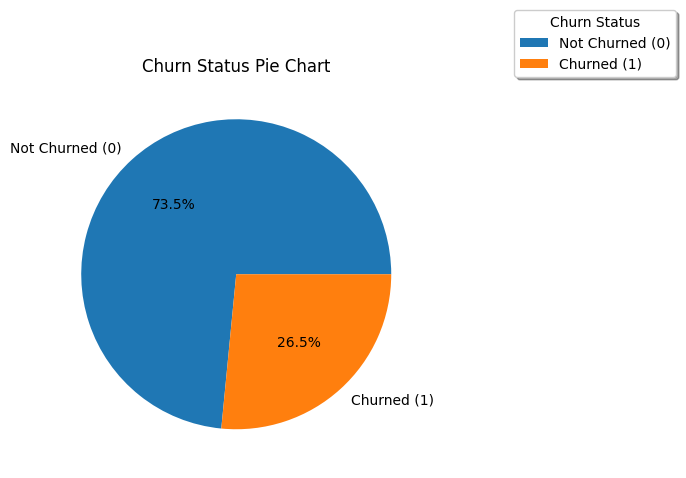

In [19]:
data=df_org["Churn Status"].value_counts()
print(data)
labels = ['Not Churned (0)', 'Churned (1)']

plt.figure(figsize=(5, 8))
plt.pie(data.values, labels=labels, autopct='%1.1f%%')
plt.legend(title = "Churn Status",bbox_to_anchor=(1.2, 1.2),loc='upper left',shadow="True")
plt.title('Churn Status Pie Chart')
plt.show()


Churn Category   Churn Status
Attitude         1                314
Competitor       1                841
Dissatisfaction  1                303
No churn         0               5174
Other            1                200
Price            1                211
Name: Churn Category, dtype: int64

Correlation value -  -0.55


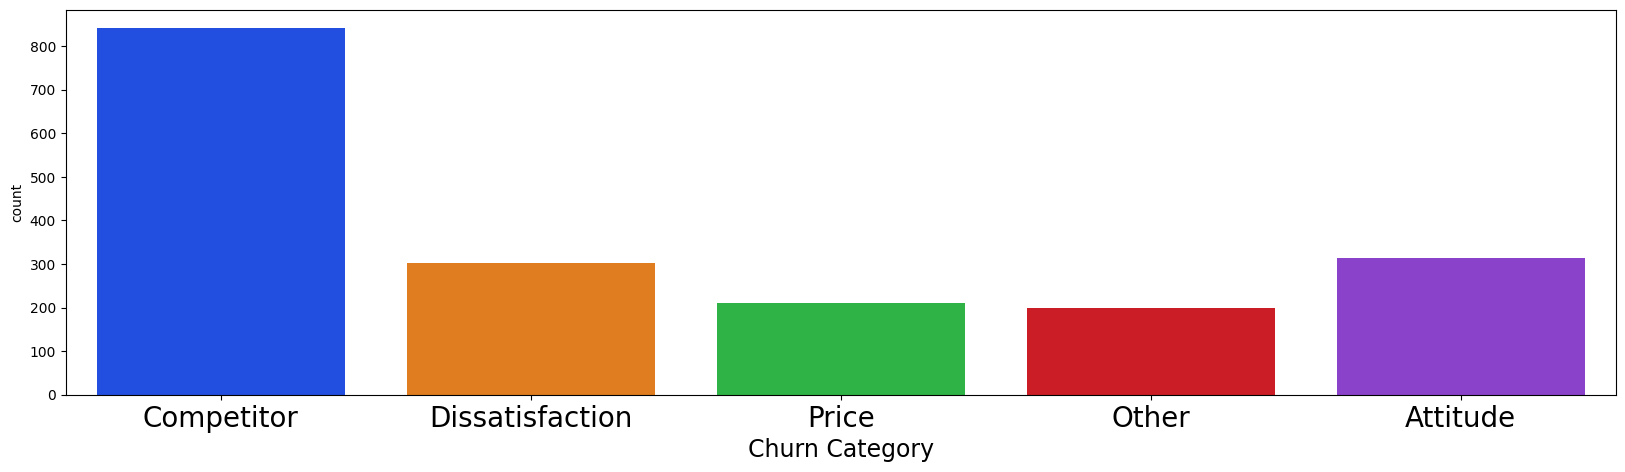

In [20]:
plt.figure(figsize=(20,5))

print(df_org.groupby([ "Churn Category","Churn Status"])["Churn Category"].count())
sns.countplot(x=df_org[df_org["Churn Category"]!="No churn"]["Churn Category"],data=df_org,palette="bright")
plt.xlabel("Churn Category",fontsize=17)
plt.xticks(size=20)
print("\nCorrelation value - ",df[["Churn Category","Churn Status"]].corr().iloc[0][1].round(2))

"Competitor" has the highest count among the provided categories, indicating that a significant portion of churn is attributed to customers switching to a competitor.
"Attitude" and "Dissatisfaction" categories have relatively lower counts compared to "Competitor," suggesting that while customer experience issues contribute to churn, competition plays a substantial role.
"Price" and "Other" categories also contribute to churn but with counts lower than "Competitor." \ When looking at the percentage of churn within each category, "Competitor" also has the highest percentage (45.0%),"Attitude" (16.8%), "Dissatisfaction" (16.2%), "Price" (11.3%), and "Other" (10.7%).

Churn Category   Churn Reason                               Churn Status
Attitude         Attitude of service provider               1                 94
                 Attitude of support person                 1                220
Competitor       Competitor had better devices              1                313
                 Competitor made better offer               1                311
                 Competitor offered higher download speeds  1                100
                 Competitor offered more data               1                117
Dissatisfaction  Lack of self-service on Website            1                 29
                 Limited range of services                  1                 37
                 Network reliability                        1                 72
                 Poor expertise of online support           1                 13
                 Poor expertise of phone support            1                 12
                 Product dissatisfac

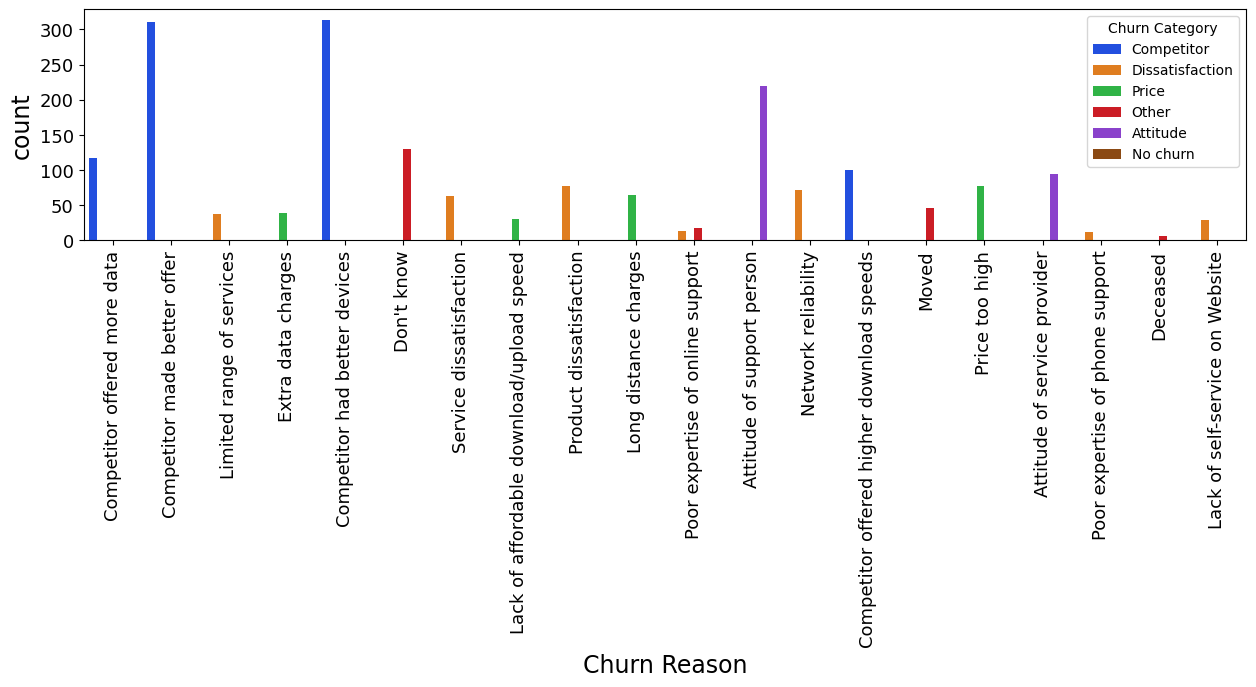

In [21]:
print(df_org.groupby([ "Churn Category","Churn Reason","Churn Status"])["Churn Category"].count())

plt.figure(figsize=(15,3))
plt.xlabel("Churn Reason",fontsize=17)
plt.ylabel("count",fontsize=17)
plt.yticks(size=13)
plt.xticks(size=13,rotation=90)

sns.countplot(x=df_org[df_org["Churn Reason"]!="No churn"]["Churn Reason"],data=df_org,hue="Churn Category",palette="bright")

print("Correlation value - ",df[["Churn Reason","Churn Status"]].corr().iloc[0][1].round(2))

"Competitor had better devices" and "Competitor made a better offer" have higher counts, suggesting that competition and the offerings of competitors are significant factors in customer churn.
"Attitude of service provider" and "Attitude of support person" also have notable counts, indicating that customer service and provider attitudes contribute to churn.

Correlation value -  0.54


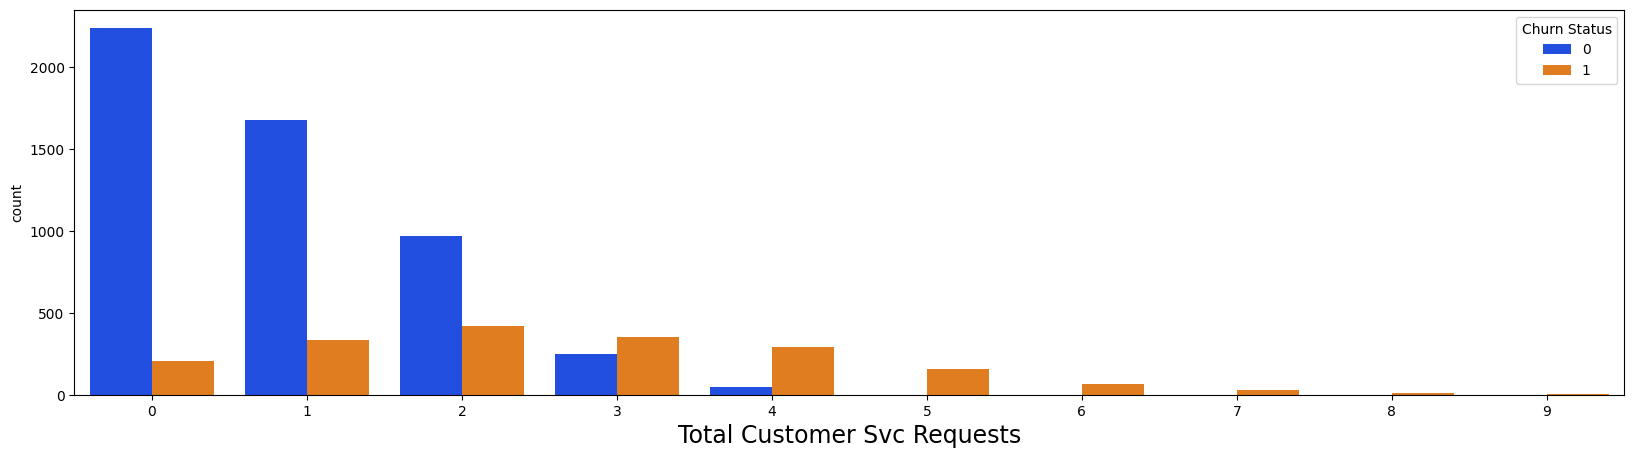

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x=df_org["Total Customer Svc Requests"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Total Customer Svc Requests",fontsize=17)
print("Correlation value - ",df[["Total Customer Svc Requests","Churn Status"]].corr().iloc[0][1].round(2))

The positive correlation of 0.54 indicates that as the total number of customer service requests increases, the likelihood of churn also increases. This suggests that customers who make more service requests might be dissatisfied with the service.

Contract        Churn Status
Month-to-Month  0               1955
                1               1655
One Year        0               1384
                1                166
Two Year        0               1835
                1                 48
Name: Contract, dtype: int64
Correlation value -  -0.44


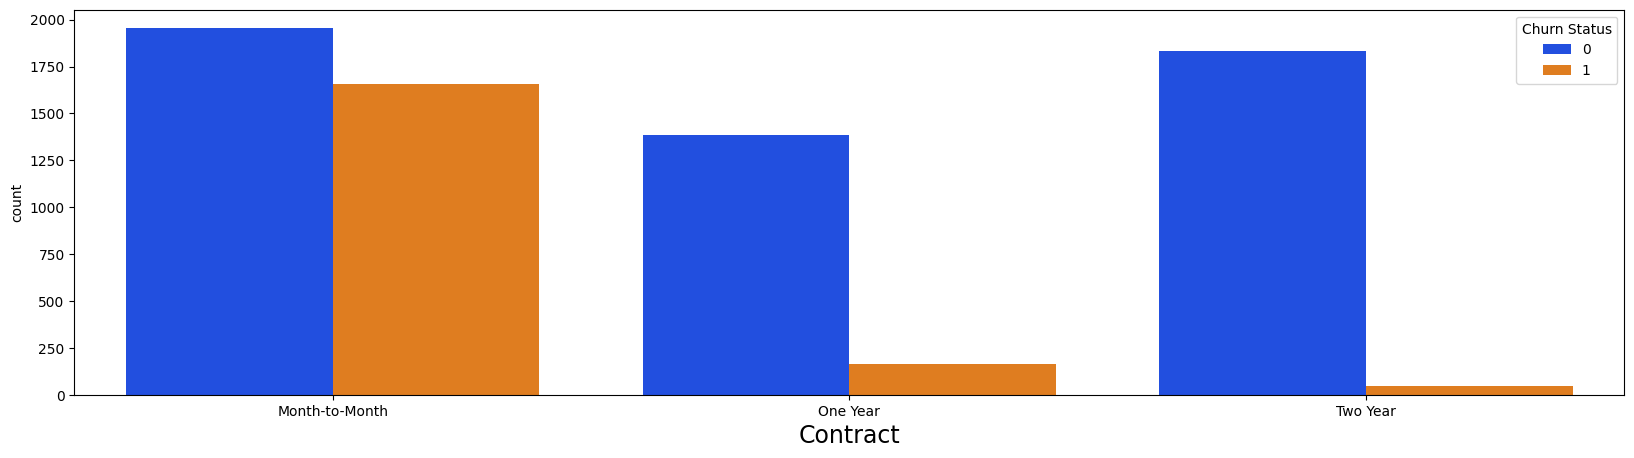

In [23]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Contract","Churn Status"])["Contract"].count())
sns.countplot(x=df_org["Contract"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Contract",fontsize=17)
print("Correlation value - ",df[["Contract","Churn Status"]].corr().iloc[0][1].round(2))

The negative correlation of -0.44 suggests that customers with shorter contract durations are more likely to churn.The highest churn rate is observed for Month-to-Month contracts (45.8%).One-Year contracts have a lower churn rate (10.7%).Two-Year contracts have the lowest churn rate (2.5%). Longer contract commitments may contribute to customer retention.

Product/Service Issues Reported  Churn Status
0                                0               4595
                                 1               1026
1                                0                455
                                 1                442
2                                0                124
                                 1                249
3                                1                 97
4                                1                 43
5                                1                  8
6                                1                  4
Name: Product/Service Issues Reported, dtype: int64
Correlation value -  0.4


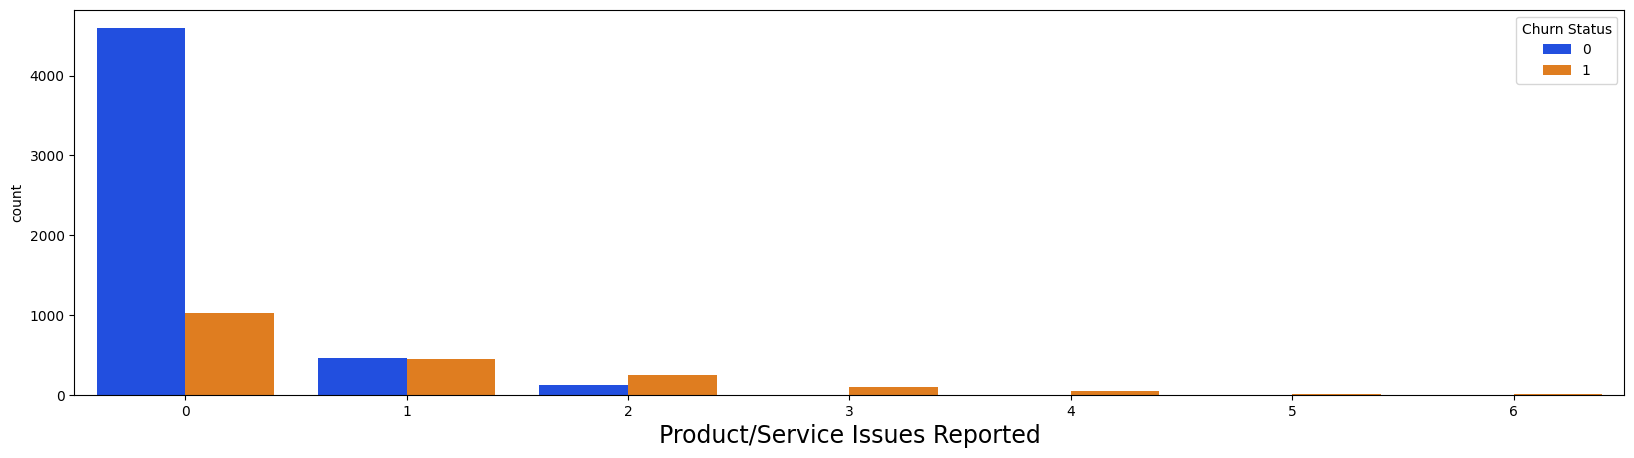

In [24]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Product/Service Issues Reported","Churn Status"])["Product/Service Issues Reported"].count())
sns.countplot(x=df_org["Product/Service Issues Reported"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Product/Service Issues Reported",fontsize=17)
print("Correlation value - ",df[["Product/Service Issues Reported","Churn Status"]].corr().iloc[0][1].round(2))

For customers reporting 3 or more issues, the churn rate is 100%.The positive correlation of 0.40 suggests that customers reporting more product or service issues are more likely to churn. This highlights the importance of addressing and resolving reported issues for customer retention.Implement strategies to proactively handle and resolve reported issues, especially for customers reporting multiple issues, to minimize churn.

Correlation value -  -0.35


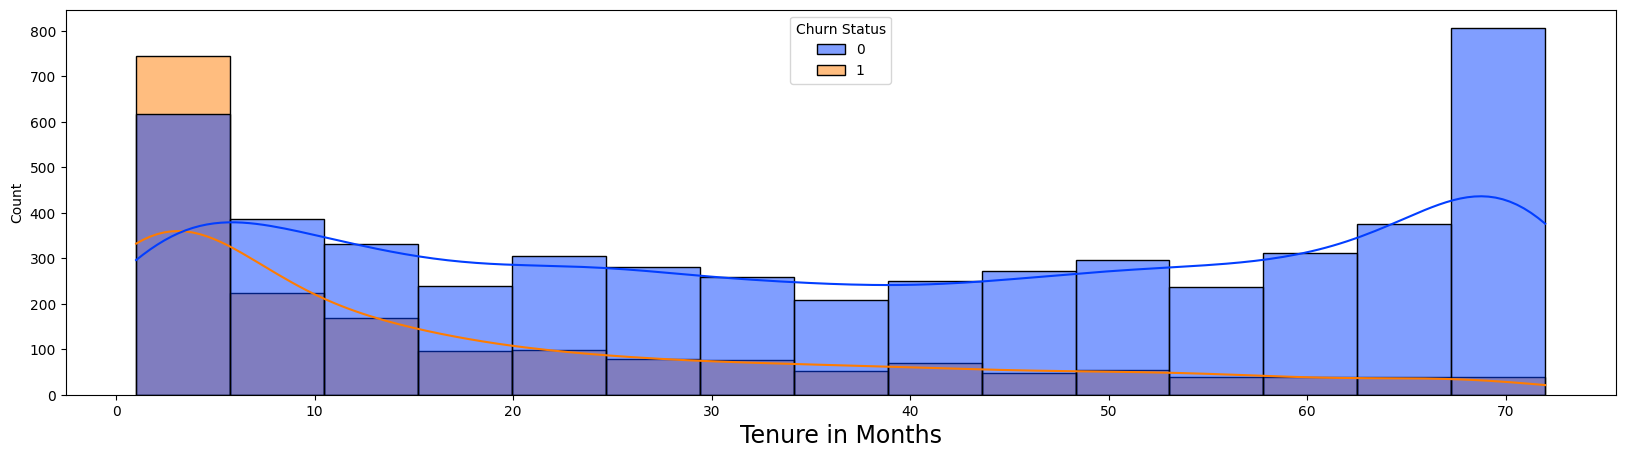

In [25]:
plt.figure(figsize=(20,5))
plt.xlabel("Tenure in Months",fontsize=17)
sns.histplot(x=df_org["Tenure in Months"],data=df_org,hue="Churn Status",palette="bright",kde=True)
print("Correlation value - ",df[["Tenure in Months","Churn Status"]].corr().iloc[0][1].round(2))

With a negative correlation of -0.35, this indicates that customers with shorter tenure (fewer months with the service) are more likely to churn.

Internet Type  Churn Status
Cable          0                748
               1                798
DSL            0               1155
               1                525
Fiber Optic    0               1858
               1                433
Not opted      0               1413
               1                113
Name: Internet Type, dtype: int64
Correlation value -  -0.35


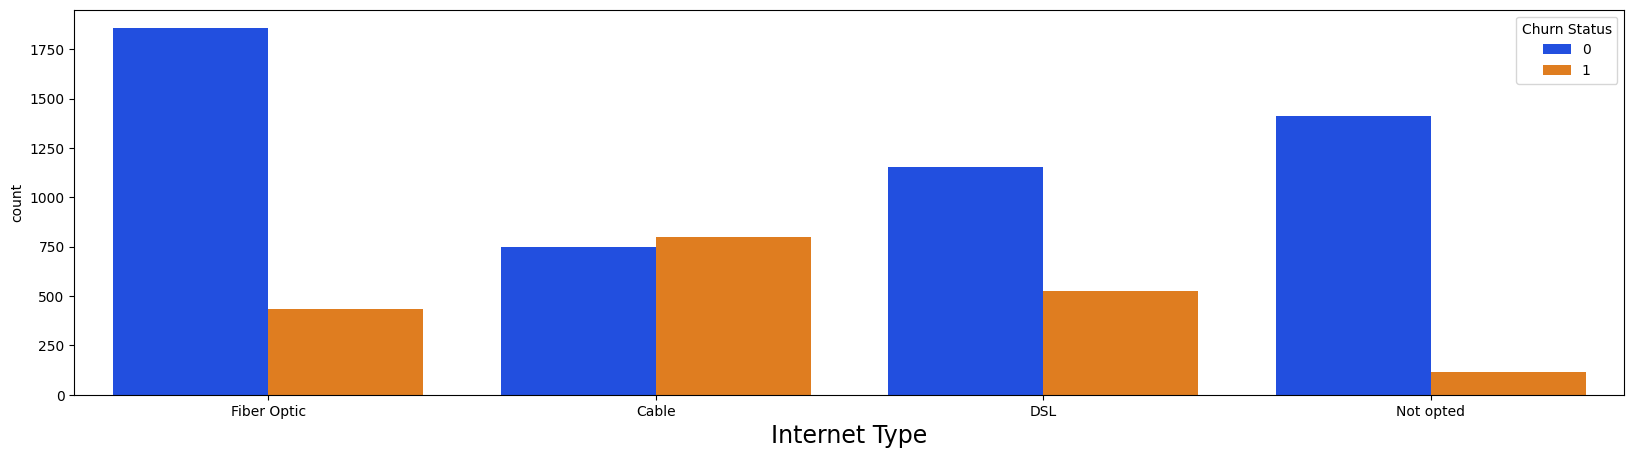

In [26]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Internet Type","Churn Status"])["Internet Type"].count())
sns.countplot(x=df_org["Internet Type"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Internet Type",fontsize=17)
print("Correlation value - ",df[["Internet Type","Churn Status"]].corr().iloc[0][1].round(2))

Cable has the highest churn rate at 51.6%.
DSL has a lower churn rate at 31.2%.
Fiber Optic has a lower churn rate at 18.9%.
Not opting for any specific internet service has the lowest churn rate at 7.4%.
Similar to tenure, a negative correlation of -0.35 implies that customers with a certain type of internet connection are more likely to churn.This suggests that customers with "Fiber Optic" internet service may be less likely to churn compared to customers with other types of internet service.The counts for "Not opted" are higher for non-churn cases compared to churn cases.
Consider analyzing the reasons behind the high churn rate for Cable and exploring strategies to improve customer satisfaction and retention for Cable subscribers.

Correlation value -  -0.29


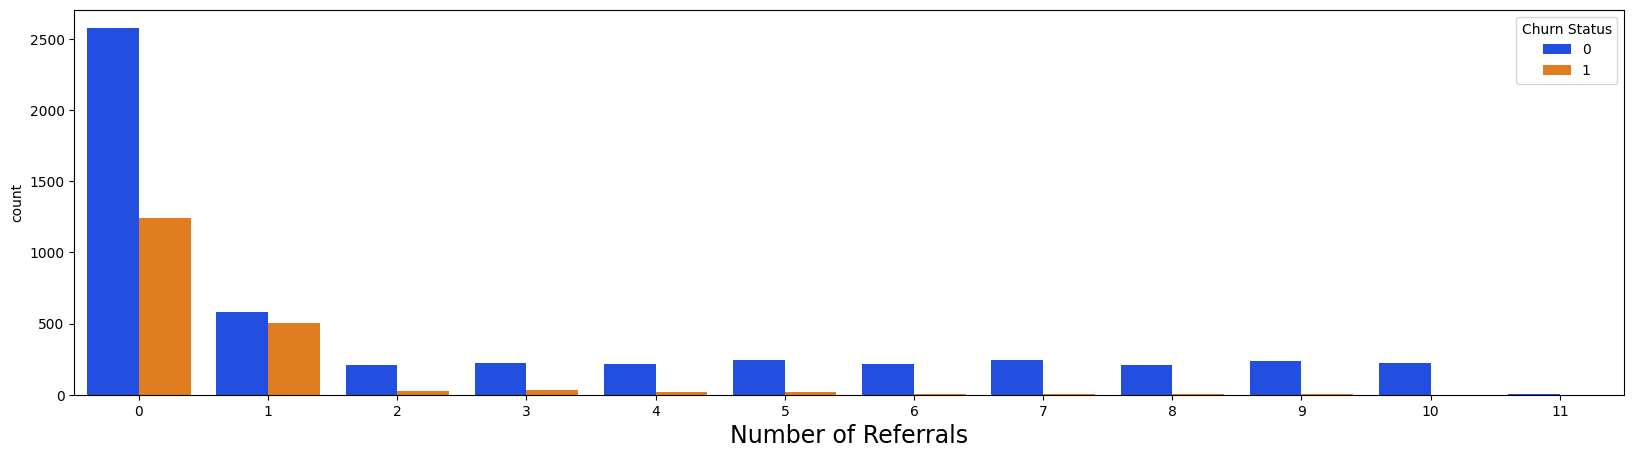

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x=df_org["Number of Referrals"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Number of Referrals",fontsize=17)
print("Correlation value - ",df[["Number of Referrals","Churn Status"]].corr().iloc[0][1].round(2))

A negative correlation of -0.29 suggests that as the number of referrals decreases, the likelihood of churn increases. In other words, customers with fewer referrals are more likely to churn.

Dependents  Churn Status
No          0               3653
            1               1763
Yes         0               1521
            1                106
Name: Dependents, dtype: int64
Correlation value -  -0.25


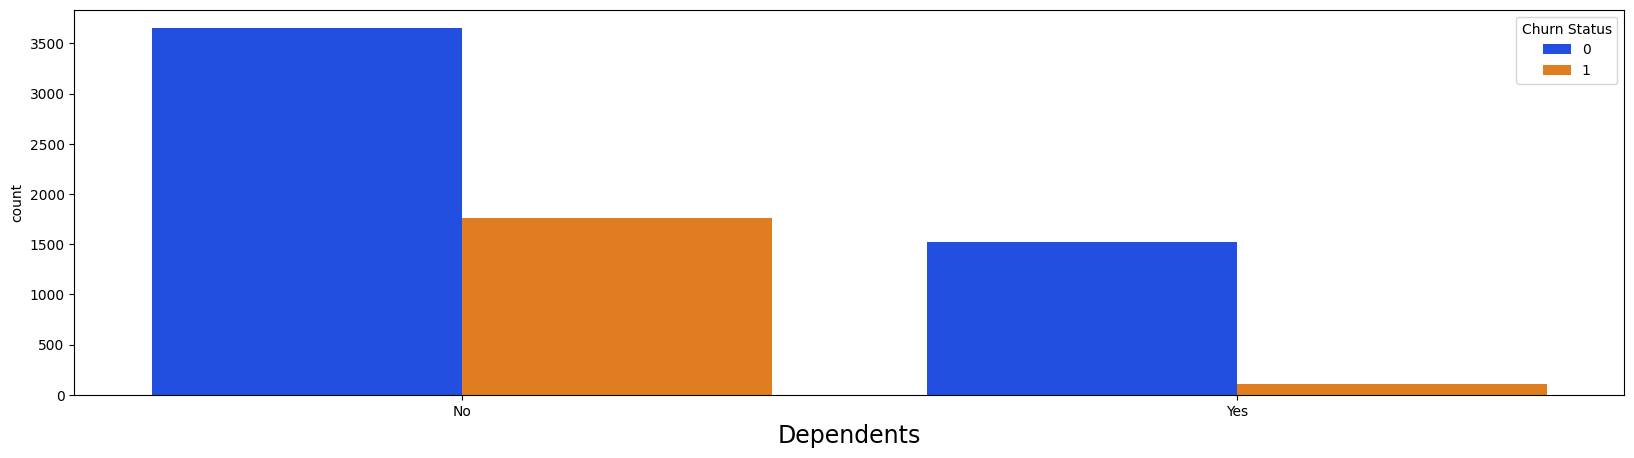

In [28]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Dependents","Churn Status"])["Dependents"].count())
sns.countplot(x=df_org["Dependents"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Dependents",fontsize=17)
print("Correlation value - ",df[["Dependents","Churn Status"]].corr().iloc[0][1].round(2))

Customers with no dependents have a higher churn rate at 32.5%.
Customers with dependents have a lower churn rate at 6.5%.
The negative correlation of -0.25 suggests that customers without dependents are more likely to churn compared to those with dependents.
Consider targeting marketing strategies or incentives towards customers with dependents to improve retention.

Correlation value -  0.23


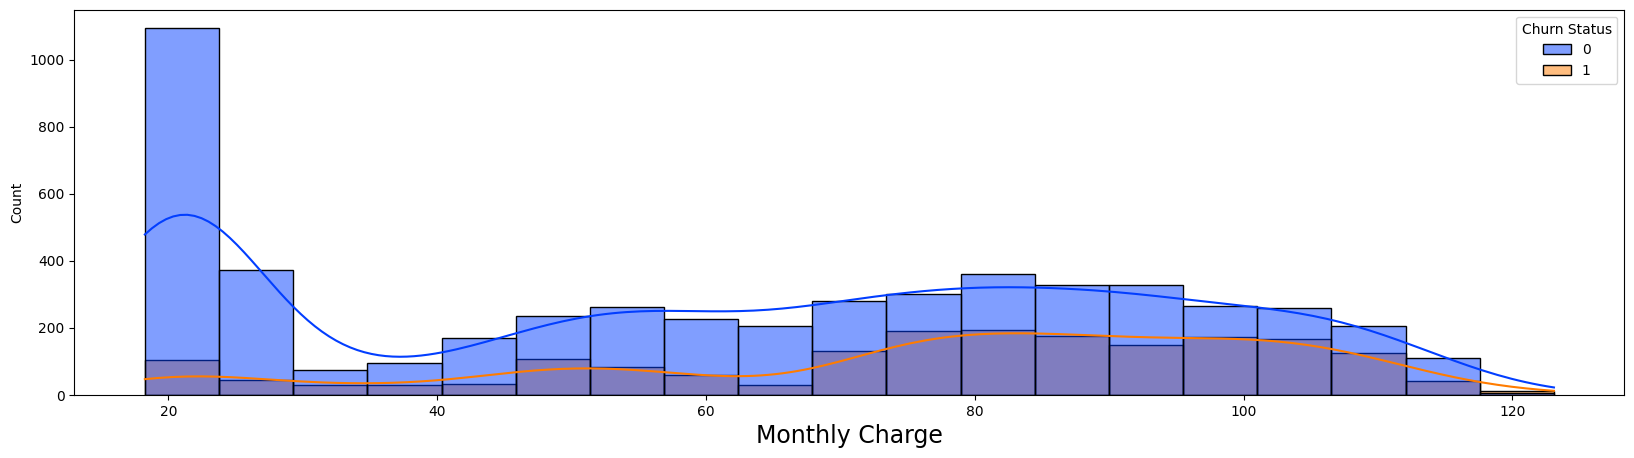

In [29]:
plt.figure(figsize=(20,5))
sns.histplot(x=df_org["Monthly Charge"],data=df_org,palette="bright",hue="Churn Status",kde=True)
plt.xlabel("Monthly Charge",fontsize=17)
print("Correlation value - ",df[["Monthly Charge","Churn Status"]].corr().iloc[0][1].round(2))

A positive correlation of 0.23 indicates that as the monthly charge increases, the likelihood of churn also increases. Higher charges might contribute to customer dissatisfaction.

Internet Service  Churn Status
No                0               1413
                  1                113
Yes               0               3761
                  1               1756
Name: Internet Service, dtype: int64
Correlation value -  0.23


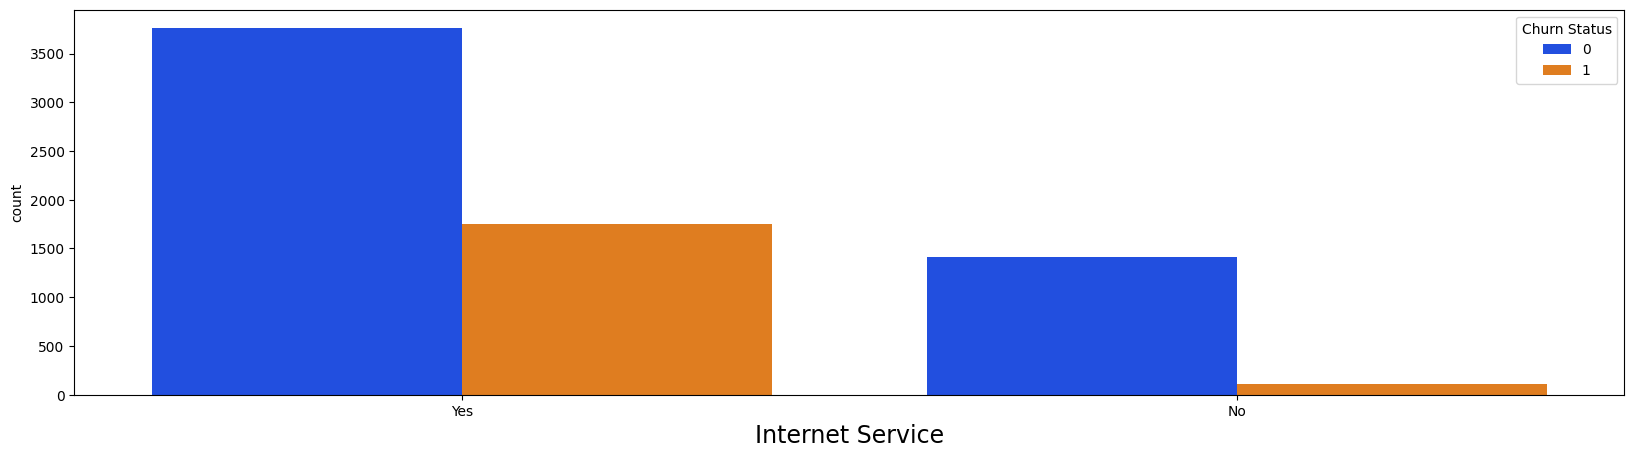

In [30]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Internet Service","Churn Status"])["Internet Service"].count())
sns.countplot(x=df_org["Internet Service"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Internet Service",fontsize=17)
print("Correlation value - ",df[["Internet Service","Churn Status"]].corr().iloc[0][1].round(2))

Customers with internet service have a higher churn rate at 31.8%.
Customers without internet service have a lower churn rate at 7.4%.
Consider exploring the reasons behind the higher churn rate for customers with internet service and implement strategies to improve retention in this segment.

Correlation value -  -0.22


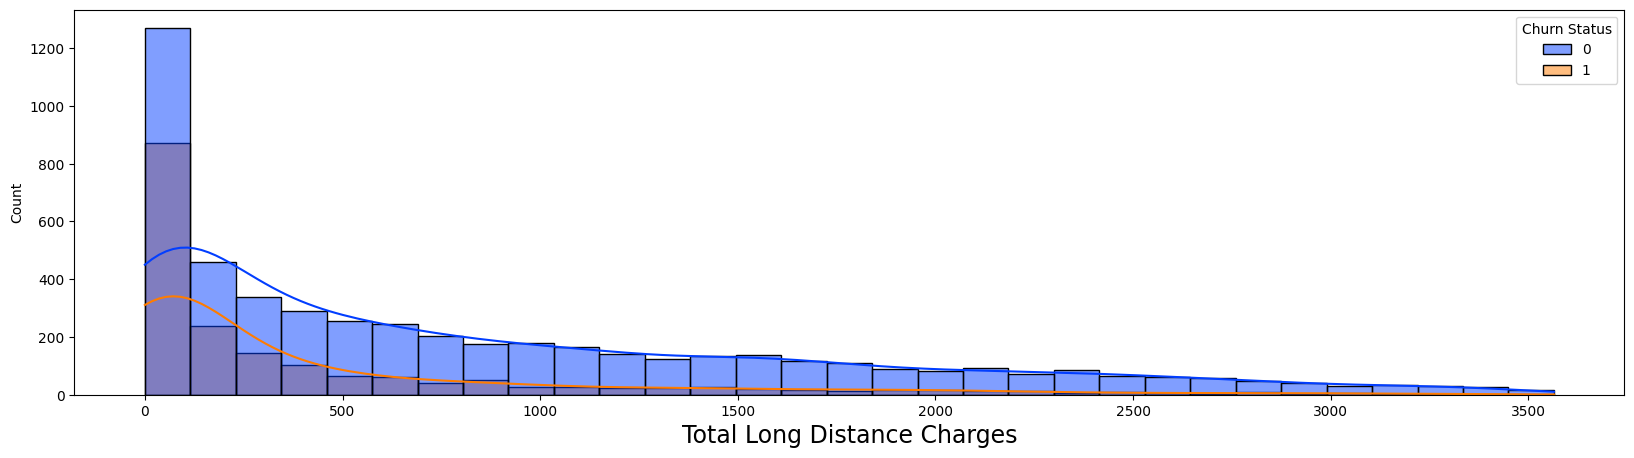

In [31]:
plt.figure(figsize=(20,5))
sns.histplot(x=df_org["Total Long Distance Charges"],data=df_org,palette="bright",hue="Churn Status",kde=True)
plt.xlabel("Total Long Distance Charges",fontsize=17)
print("Correlation value - ",df[["Total Long Distance Charges","Churn Status"]].corr().iloc[0][1].round(2))

Correlation value -  -0.2


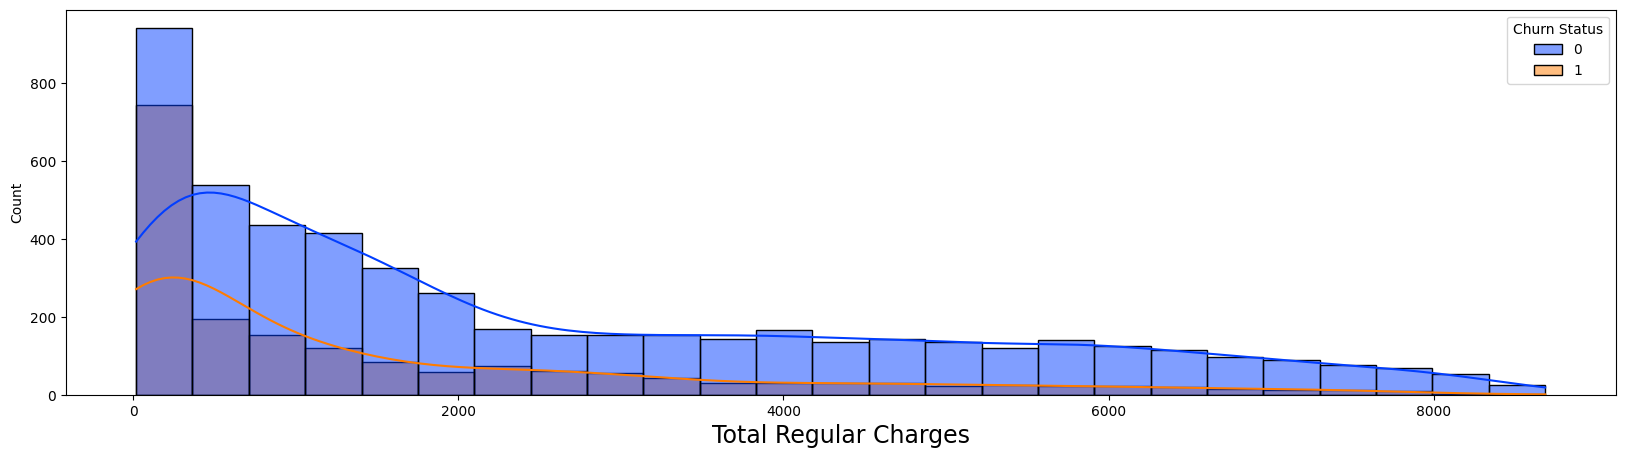

In [32]:
  
plt.figure(figsize=(20,5))
sns.histplot(x=df_org["Total Regular Charges"],data=df_org,palette="bright",hue="Churn Status",kde=True)
plt.xlabel("Total Regular Charges",fontsize=17)
print("Correlation value - ",df[["Total Regular Charges","Churn Status"]].corr().iloc[0][1].round(2))

Paperless Billing  Churn Status
No                 0               2403
                   1                469
Yes                0               2771
                   1               1400
Name: Paperless Billing, dtype: int64
Correlation value -  0.19


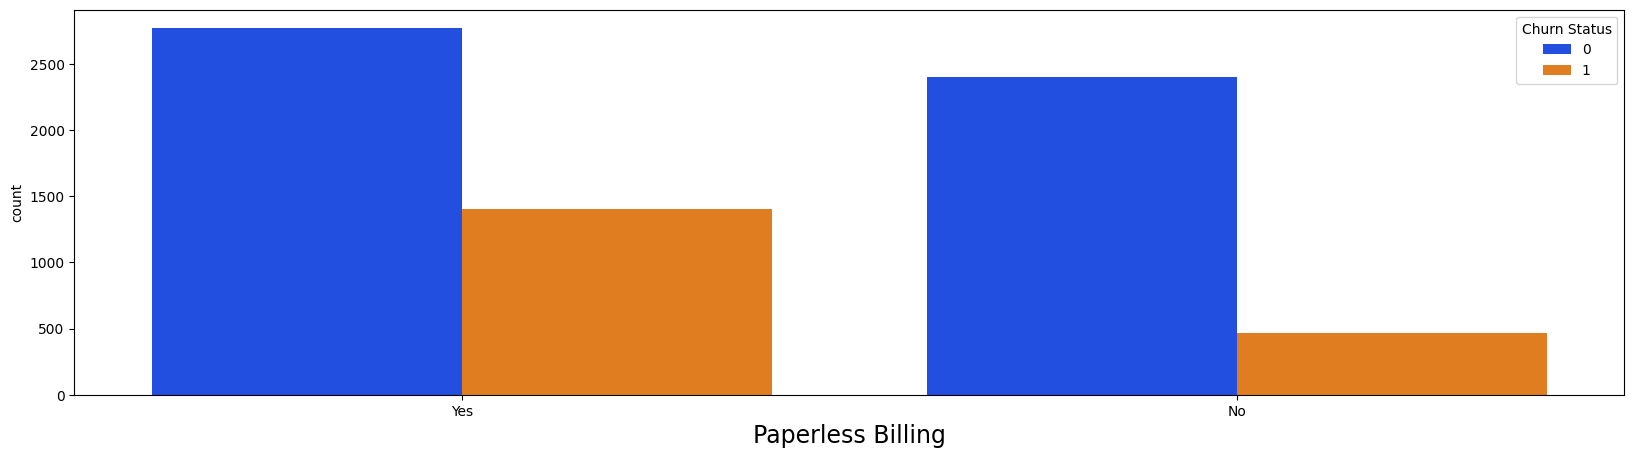

In [33]:

plt.figure(figsize=(20,5))
print(df_org.groupby([ "Paperless Billing","Churn Status"])["Paperless Billing"].count())
sns.countplot(x=df_org["Paperless Billing"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Paperless Billing",fontsize=17)
print("Correlation value - ",df[["Paperless Billing","Churn Status"]].corr().iloc[0][1].round(2))


The churn rate for customers with paperless billing (Yes) is higher (33.5%) compared to the churn rate for customers without paperless billing (No) at 16.3%.From this analysis, it appears that customers who do not have paperless billing (No) have a lower churn rate compared to those with paperless billing (Yes).

Online Security  Churn Status
No               0               3450
                 1               1574
Yes              0               1724
                 1                295
Name: Online Security, dtype: int64
Correlation value -  -0.17


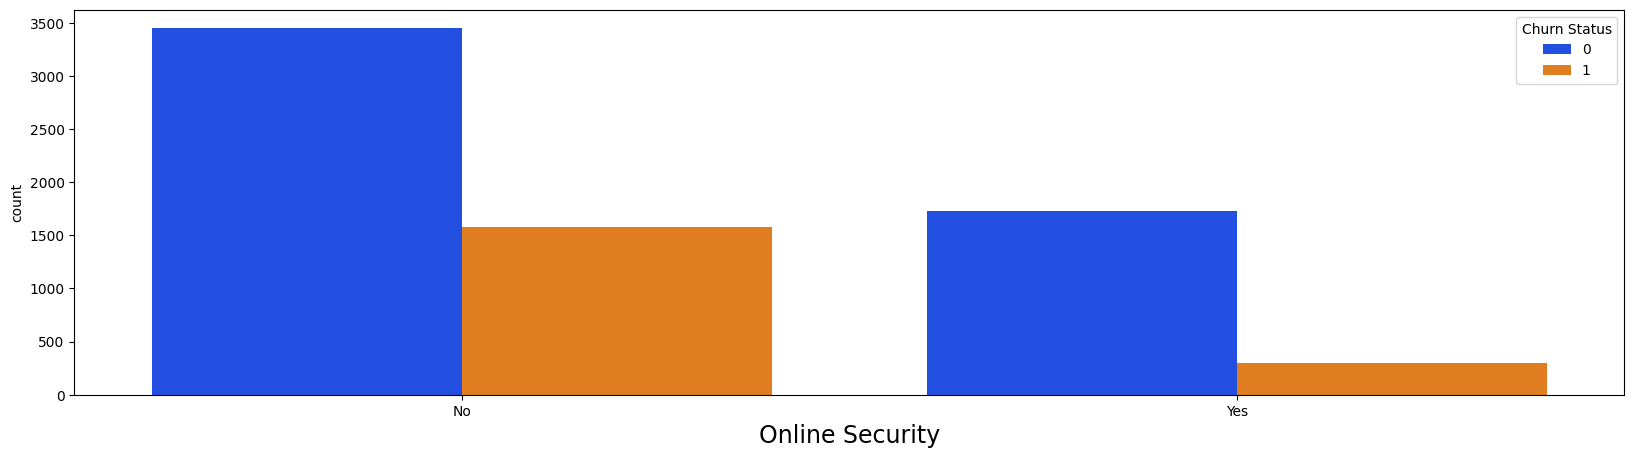

In [34]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Online Security","Churn Status"])["Online Security"].count())
sns.countplot(x=df_org["Online Security"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Online Security",fontsize=17)
print("Correlation value - ",df[["Online Security","Churn Status"]].corr().iloc[0][1].round(2))


The churn rate for customers with online security (Yes) is lower (14.6%) compared to the churn rate for customers without online security (No) at 31.3%.From this analysis, it appears that customers who have online security (Yes) have a lower churn rate compared to those without online security (No).Consider promoting the benefits of online security features to customers and implementing strategies to encourage adoption.

Premium Tech Support  Churn Status
No                    0               3440
                      1               1559
Yes                   0               1734
                      1                310
Name: Premium Tech Support, dtype: int64
Correlation value -  -0.16


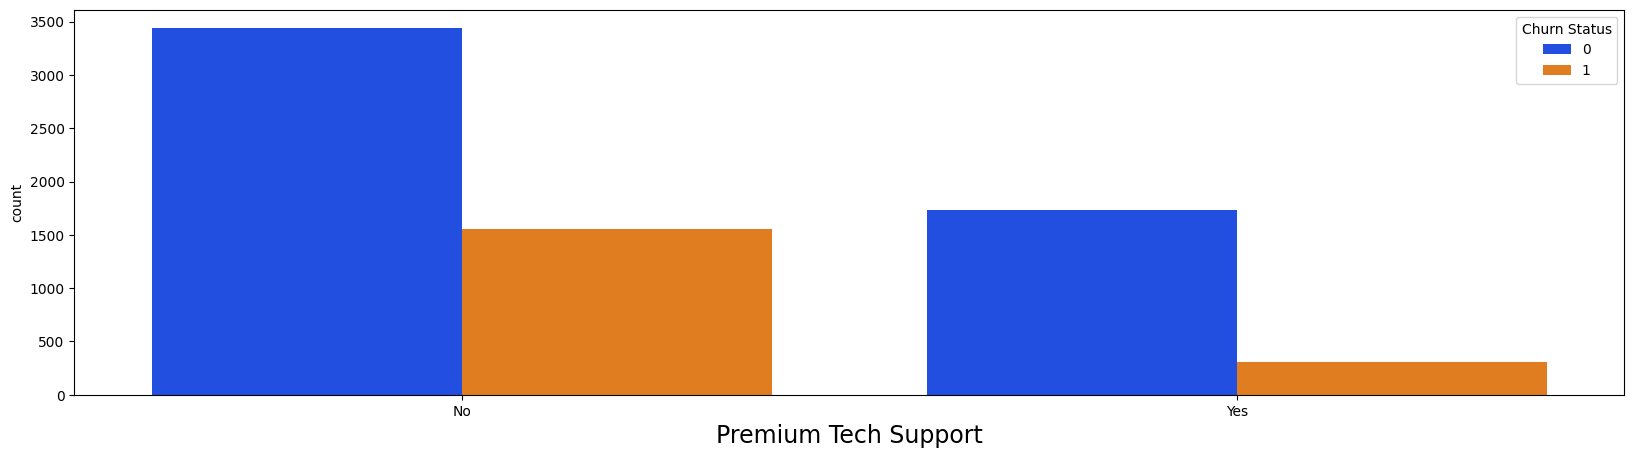

In [35]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Premium Tech Support","Churn Status"])["Premium Tech Support"].count())
sns.countplot(x=df_org["Premium Tech Support"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Premium Tech Support",fontsize=17)
print("Correlation value - ",df[["Premium Tech Support","Churn Status"]].corr().iloc[0][1].round(2))


Senior Citizen  Churn Status
No              0               4508
                1               1393
Yes             0                666
                1                476
Name: Senior Citizen, dtype: int64
Correlation value -  0.15


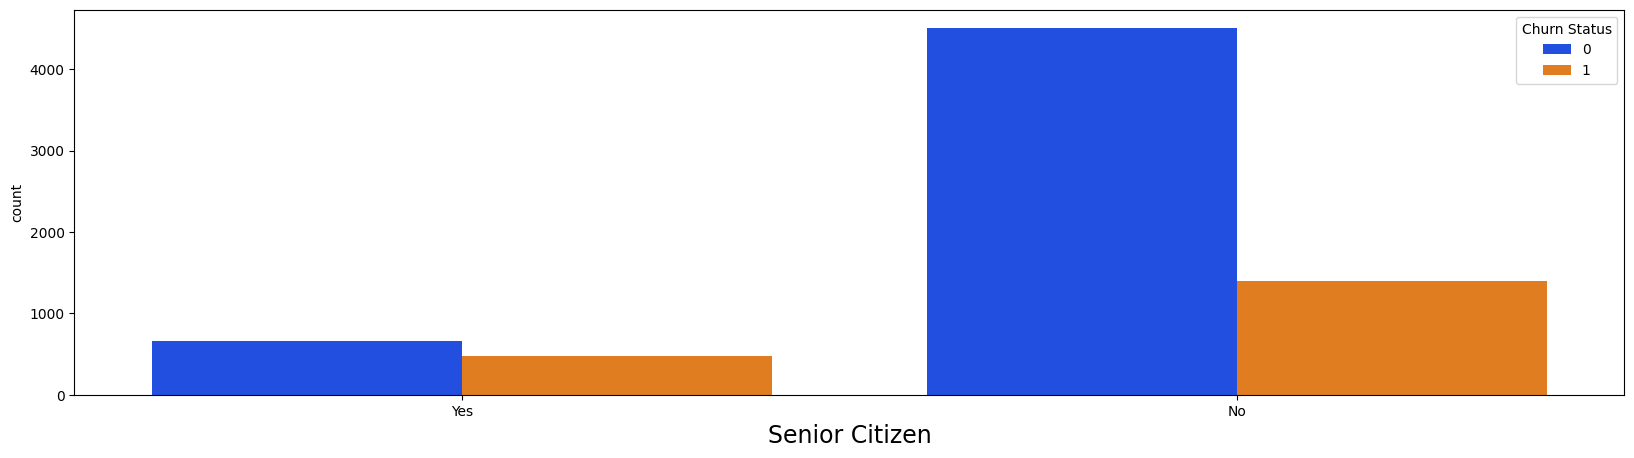

In [36]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Senior Citizen","Churn Status"])["Senior Citizen"].count())
sns.countplot(x=df_org["Senior Citizen"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Senior Citizen",fontsize=17)
print("Correlation value - ",df[["Senior Citizen","Churn Status"]].corr().iloc[0][1].round(2))


Senior citizens have a higher churn rate at 41.6%.
Customers who are not senior citizens have a lower churn rate at 23.6%.
Consider exploring the reasons behind the higher churn rate for senior citizens and implementing targeted retention strategies for this segment.
Tailor communication and offers to address the specific needs and preferences of senior citizen customers.

Married  Churn Status
No       0               2441
         1               1200
Yes      0               2733
         1                669
Name: Married, dtype: int64
Correlation value -  -0.15


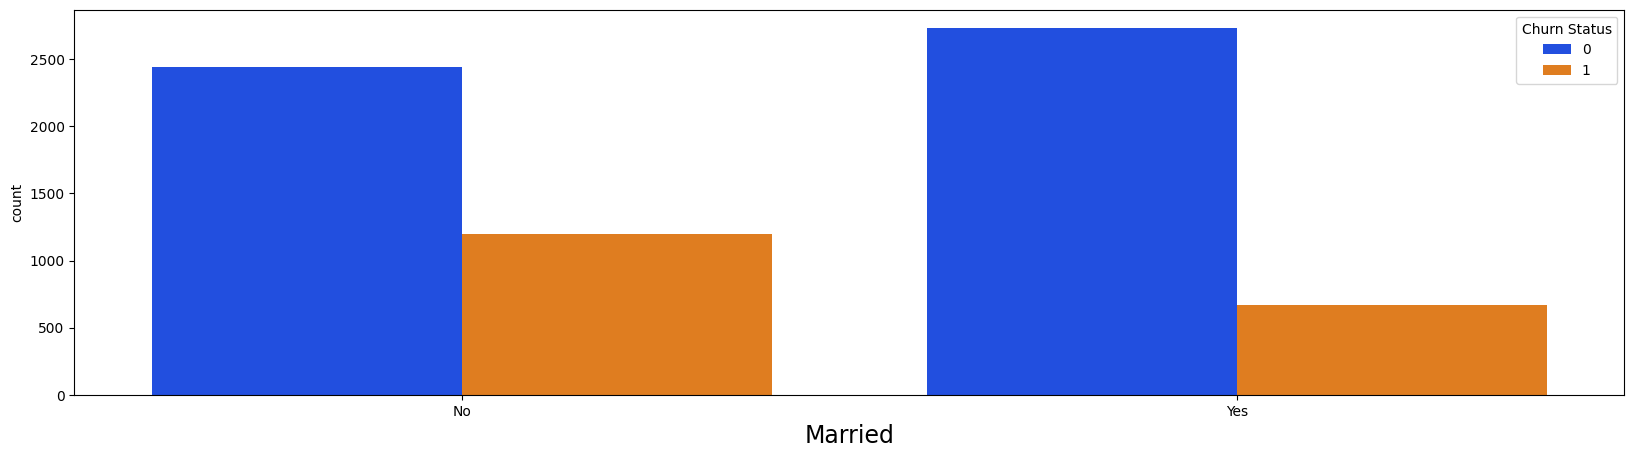

In [37]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Married","Churn Status"])["Married"].count())
sns.countplot(x=df_org["Married"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Married",fontsize=17)
print("Correlation value - ",df[["Married","Churn Status"]].corr().iloc[0][1].round(2))


Customers who are not married have a higher churn rate at 32.9%.
Married customers have a lower churn rate at 19.7%.Consider exploring the reasons behind the higher churn rate for customers who are not married and implementing targeted retention strategies for this segment.

Referred a Friend  Churn Status
No                 0               2576
                   1               1245
Yes                0               2598
                   1                624
Name: Referred a Friend, dtype: int64
Correlation value -  -0.15


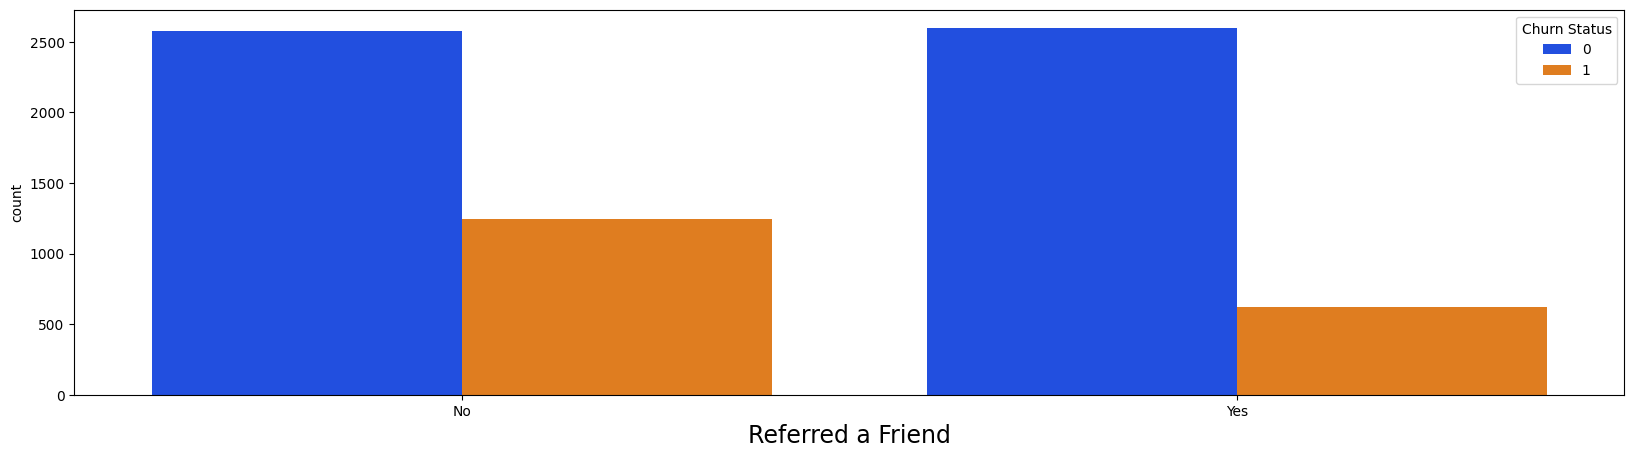

In [38]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Referred a Friend","Churn Status"])["Referred a Friend"].count())
sns.countplot(x=df_org["Referred a Friend"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Referred a Friend",fontsize=17)
print("Correlation value - ",df[["Referred a Friend","Churn Status"]].corr().iloc[0][1].round(2))


Customers who have not referred a friend have a higher churn rate at 32.6%.
Customers who have referred a friend have a lower churn rate at 19.4%.Consider encouraging and incentivizing customer referrals as it may contribute to customer retention.
Implement targeted strategies to engage and retain customers who have not referred a friend.

Unlimited Data  Churn Status
No              0               2969
                1               1370
Yes             0               2205
                1                499
Name: Unlimited Data, dtype: int64
Correlation value -  -0.14


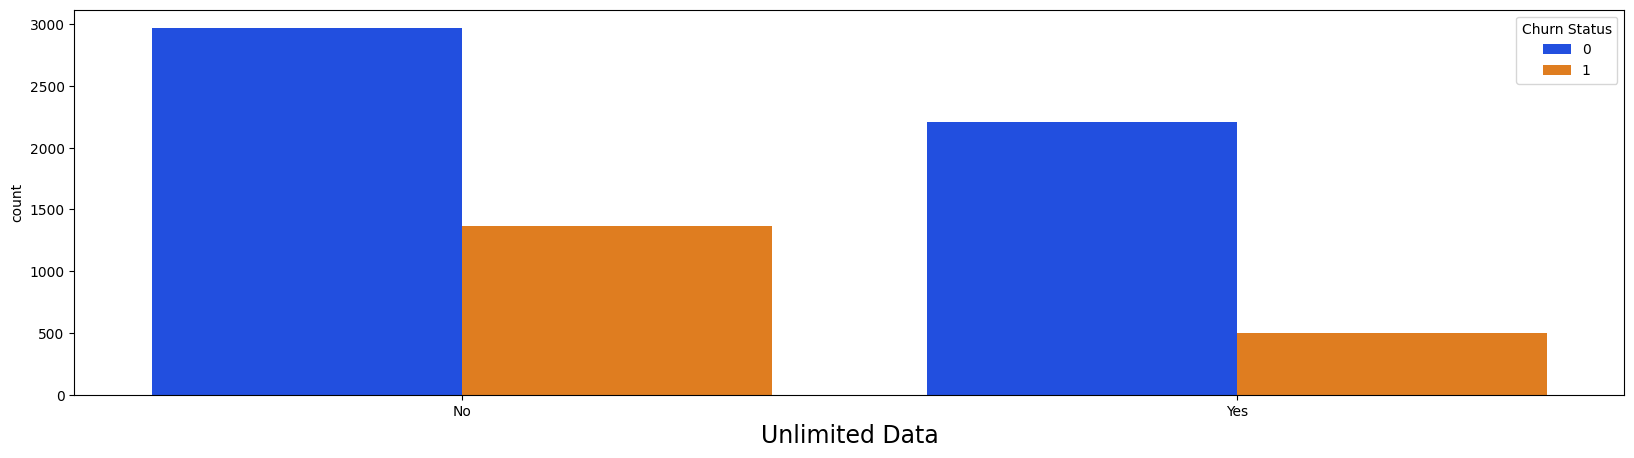

In [39]:

plt.figure(figsize=(20,5))
print(df_org.groupby([ "Unlimited Data","Churn Status"])["Unlimited Data"].count())
sns.countplot(x=df_org["Unlimited Data"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Unlimited Data",fontsize=17)
print("Correlation value - ",df[["Unlimited Data","Churn Status"]].corr().iloc[0][1].round(2))


Customers without unlimited data have a higher churn rate at 31.6%.
Customers with unlimited data have a lower churn rate at 18.5%.
Consider promoting and offering unlimited data plans as they may contribute to customer retention.

Offer     Churn Status
No offer  0               2826
          1               1051
Offer A   0                485
          1                 35
Offer B   0                723
          1                101
Offer C   0                320
          1                 95
Offer D   0                441
          1                161
Offer E   0                379
          1                426
Name: Offer, dtype: int64
Correlation value -  0.12


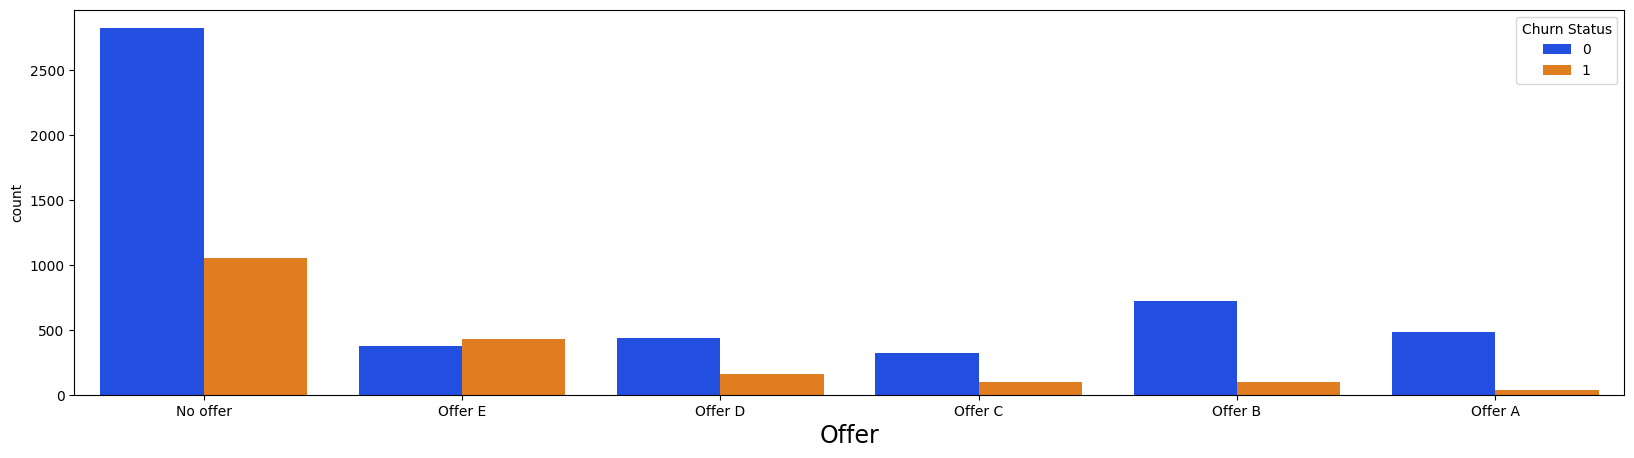

In [40]:
plt.figure(figsize=(20,5))
print(df_org.groupby([ "Offer","Churn Status"])["Offer"].count())
sns.countplot(x=df_org["Offer"],data=df_org,hue="Churn Status",palette="bright")
plt.xlabel("Offer",fontsize=17)
print("Correlation value - ",df[["Offer","Churn Status"]].corr().iloc[0][1].round(2))


Offer A has the lowest churn rate at 6.7%.
Offer B and Offer C have moderate churn rates.
No Offer and Offer D have similar churn rates.
Offer E has the highest churn rate at 52.9%.
Offer A appears to be the most effective in terms of reducing churn.
Consider analyzing the characteristics and benefits of Offer A to understand why it performs well and apply insights to other offers.
Reevaluate and potentially modify Offer E to improve its effectiveness in retaining customers.

## Feature Selection

## Correlation

Here we are analyzing the correlation between features in your dataset and the target variable 'Churn Status'. This code extracts columns from the DataFrame that are correlated with 'Churn Status' in the range of 0.3 to 0.5. Then, we created a bar plot to visualize the correlations and created a new DataFrame (df_corr) containing only those correlated columns.


There are 7 Correlated columns with 'Churn Status'.They are 
Number of Referrals               -0.29
Tenure in Months                  -0.35
Internet Type                     -0.35
Contract                          -0.44
Dependents                        -0.25
Product/Service Issues Reported    0.40
Senior Citizen                     0.15
dtype: float64


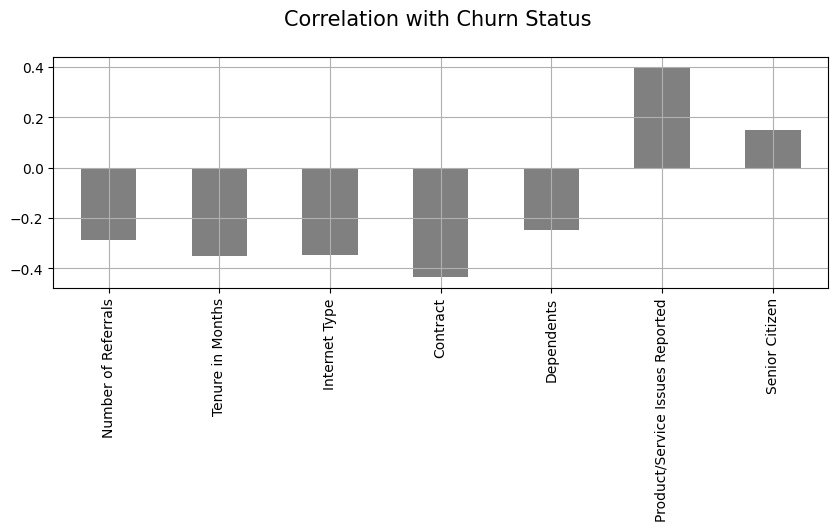

In [41]:
data = df.loc[:, df.columns != 'Churn Status']

correlations = data.corrwith(df['Churn Status'])
#print(correlations)
corr_col = correlations[(0.24 <= abs(correlations)) & (abs(correlations) <= 0.5)]

#print(correlations[(0.1 <= abs(correlations)) & (abs(correlations) <= 0.24)].round(2))


corr_col = corr_col._append(pd.Series([df["Senior Citizen"].corr(df['Churn Status'])],index=["Senior Citizen"]))


print("\nThere are {} Correlated columns with 'Churn Status'.They are \n{}".format(len(corr_col),corr_col.round(2)))


corr_col.plot.bar(
        figsize = (10, 3), 
        fontsize = 10, 
        color = 'grey',
        rot = 90, grid = True)
plt.title('Correlation with Churn Status \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "15", fontfamily = "sans-serif")

df_corr=df[corr_col.index]


In [42]:
X = df_corr
Y = df_org['Churn Status']
print("The no. of  features selected for modelling is {}.\nThe features are {}".format(len(X.columns),list(X.columns)))


The no. of  features selected for modelling is 7.
The features are ['Number of Referrals', 'Tenure in Months', 'Internet Type', 'Contract', 'Dependents', 'Product/Service Issues Reported', 'Senior Citizen']


## Splitting the dataset

In [43]:
X_train,X_test,Y_train,Y_test,=train_test_split(X,Y,train_size=0.80,random_state=1)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (5634, 7)
Shape of X_test: (1409, 7)
Shape of Y_train: (5634,)
Shape of Y_test: (1409,)


Using the train_test_split function we split our data into training and testing sets.Here train_size=0.80 specifies that 80% of the data will be used for training, and the remaining 20% for testing.

## Scaling

In [44]:
scaled= MinMaxScaler()  
X_train= scaled.fit_transform(X_train)  
X_test=scaled.transform(X_test)

MinMaxScaler is commonly used when features have different ranges, and you want to ensure that all features contribute equally to the model. It's often applied before training models. It scales and transforms the features to a specific range, typically between 0 and 1. To use MinMaxScaler, you first create an instance of the scaler. Then, you use the fit_transform method to learn the scaling parameters (using the training data) and simultaneously transform the data. For test data, you use the transform method to apply the scaling learned from the training data.

In [45]:
score={}

## Classification machine learning models

## Logistic Regression

Logistic Regression:

How it works: Logistic Regression models the relationship between the independent variables and the probability of a particular outcome using the logistic function. It calculates a weighted sum of input features and applies the logistic (sigmoid) function to produce a probability score, which is then used for classification.


In [46]:
parameter = {
    'C': np.arange(10,50,10)
    
    }

LRmodel = LogisticRegression()

LR_cv=GridSearchCV(LRmodel,parameter,scoring='roc_auc',cv=5)
LR_cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",LR_cv.best_estimator_)

print("\n The best parameters across ALL searched params:\n",LR_cv.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=20)

 The best parameters across ALL searched params:
 {'C': 20}


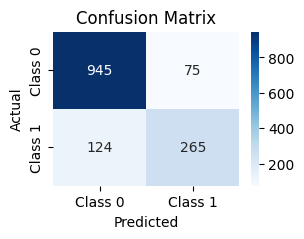

                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1020
           1       0.78      0.68      0.73       389

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.82      1409
weighted avg       0.86      0.86      0.86      1409

Train Score : 0.86
Test Score : 0.86
Accuracy_score : 0.86
F1 score : 0.86
balanced_accuracy:0.83



In [47]:
LRmodel = LR_cv.best_estimator_
LRmodel.fit(X_train, Y_train)
LRmodel_Pred = LRmodel.predict(X_test)

cm=confusion_matrix(Y_test, LRmodel_Pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('''                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |''')
print('\nClassification Report : \n', classification_report(Y_test, LRmodel_Pred))
Train_Score=LRmodel.score(X_train,Y_train).round(2)
Test_Score=LRmodel.score(X_test,Y_test).round(2)

Accuracy_Score=accuracy_score(LRmodel_Pred,Y_test).round(2)
F1_score=f1_score(Y_test, LRmodel_Pred,  average='weighted').round(2)
balanced_accuracy = balanced_accuracy_score(LRmodel_Pred,Y_test).round(2)

print("Train Score : {}\nTest Score : {}\nAccuracy_score : {}\nF1 score : {}\nbalanced_accuracy:{}\n".format(Train_Score,Test_Score,Accuracy_Score,F1_score,balanced_accuracy))

      
score['LR']={"Train_Score":Train_Score,"Test_Score":Test_Score,"Accuracy_Score":Accuracy_Score,"F1_score":F1_score,"balanced_accuracy":balanced_accuracy}




Train Score:

The training score is usually the accuracy of the model on the training dataset. It's the ratio of the number of correct predictions to the total number of training instances. The formula is:

Accuracy Score: Accuracy alone may not be a reliable metric in imbalanced datasets because a model could achieve high accuracy by simply predicting the majority class.Accuracy = (TP + TN) / (TP+FN+FP+TN) 

F1 Score: F1 score considers both precision and recall and is useful in imbalanced datasets. It provides a balance between false positives and false negatives.\
F1 = 2 * (precision * recall / precision + recall).\
Recall= TP / (TP+FN).\ 
Precision = TP/(TP + FP).

Balanced Accuracy: This metric is designed to account for imbalanced datasets by considering the sensitivity (true positive rate) and specificity (true negative rate). The balanced accuracy values are generally lower than the accuracy scores, reflecting the influence of class imbalance.\
Sensitivity= TP / (TP + FN)(Recall)(TPR)\
Specificity =TN / (TN + FP)(TNR)\
Balanced Accuracy=(Sensitivity+Specificity)/2=(TPR+TNR)/2

## Decision Tree

Decision Tree:

How it works: Decision Trees recursively split the dataset based on the most significant attribute at each node. The goal is to create a tree structure where each leaf node represents a class or a regression value. The decision-making process involves traversing the tree from the root to a leaf based on feature values.


In [48]:
parameter={
  'criterion':['gini','entropy','log_loss'],
  'max_depth':[2,3,4,5,6]
}

DTmodel = DecisionTreeClassifier()

DT_cv=GridSearchCV(DTmodel,parameter,scoring='roc_auc',cv=5)
DT_cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",DT_cv.best_estimator_)

print("\n The best parameters across ALL searched params:\n",DT_cv.best_params_)



 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='log_loss', max_depth=6)

 The best parameters across ALL searched params:
 {'criterion': 'log_loss', 'max_depth': 6}


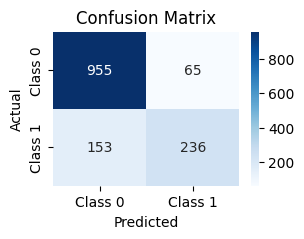

                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1020
           1       0.78      0.61      0.68       389

    accuracy                           0.85      1409
   macro avg       0.82      0.77      0.79      1409
weighted avg       0.84      0.85      0.84      1409

Train Score : 0.86
Test Score : 0.85
Accuracy_score : 0.85
F1 score : 0.84
balanced_accuracy:0.82



In [49]:
DTmodel=DT_cv.best_estimator_

DTmodel.fit(X_train,Y_train)
DTmodel_Pred = DTmodel.predict(X_test)

cm=confusion_matrix(Y_test, DTmodel_Pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('''                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |''')
print('\nClassification Report : \n', classification_report(Y_test, DTmodel_Pred))
Train_Score=DTmodel.score(X_train,Y_train).round(2)
Test_Score=DTmodel.score(X_test,Y_test).round(2)
Accuracy_Score=accuracy_score(DTmodel_Pred,Y_test).round(2)

F1_score=f1_score(Y_test, DTmodel_Pred,  average='weighted').round(2)

balanced_accuracy = balanced_accuracy_score(DTmodel_Pred,Y_test).round(2)


print("Train Score : {}\nTest Score : {}\nAccuracy_score : {}\nF1 score : {}\nbalanced_accuracy:{}\n".format(Train_Score,Test_Score,Accuracy_Score,F1_score,balanced_accuracy))


score['DT']={"Train_Score":Train_Score,"Test_Score":Test_Score,"Accuracy_Score":Accuracy_Score,"F1_score":F1_score,"balanced_accuracy":balanced_accuracy}
# from sklearn import tree
# tree.plot_tree(DTmodel)
# plt.show()


## Random Forest

Random Forest:

How it works: Random Forest builds multiple Decision Trees, each trained on a random subset of the data and using a random subset of features. The final prediction is a combination (voting or averaging) of predictions from individual trees, leading to improved accuracy and robustness compared to a single Decision Tree.


In [50]:
parameter={
    'n_estimators':[50,100],
    'max_depth':[3,4,5,6]
    }

RFCmodel = RandomForestClassifier()

RFC_cv=GridSearchCV(RFCmodel,parameter,scoring='roc_auc',cv=5)
RFC_cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",RFC_cv.best_estimator_)

print("\n The best parameters across ALL searched params:\n",RFC_cv.best_params_)



 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=6)

 The best parameters across ALL searched params:
 {'max_depth': 6, 'n_estimators': 100}


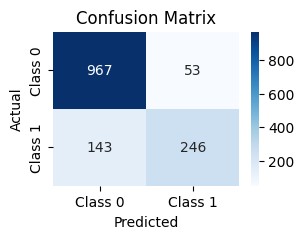

                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1020
           1       0.82      0.63      0.72       389

    accuracy                           0.86      1409
   macro avg       0.85      0.79      0.81      1409
weighted avg       0.86      0.86      0.85      1409

Train Score : 0.87
Test Score : 0.86
Accuracy_score : 0.86
F1 score : 0.85
balanced_accuracy:0.85



In [51]:

RFCmodel=RFC_cv.best_estimator_
RFCmodel.fit(X_train, Y_train)
RFCmodel_Pred = RFCmodel.predict(X_test)

cm=confusion_matrix(Y_test, RFCmodel_Pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('''                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |''')
print('\nClassification Report : \n', classification_report(Y_test, RFCmodel_Pred))
Train_Score=RFCmodel.score(X_train,Y_train).round(2)
Test_Score=RFCmodel.score(X_test,Y_test).round(2)
Accuracy_Score=accuracy_score(RFCmodel_Pred,Y_test).round(2)

F1_score=f1_score(Y_test, RFCmodel_Pred, average='weighted').round(2)

balanced_accuracy = balanced_accuracy_score(RFCmodel_Pred,Y_test).round(2)

print("Train Score : {}\nTest Score : {}\nAccuracy_score : {}\nF1 score : {}\nbalanced_accuracy:{}\n".format(Train_Score,Test_Score,Accuracy_Score,F1_score,balanced_accuracy))


score['RFC']={"Train_Score":Train_Score,"Test_Score":Test_Score,"Accuracy_Score":Accuracy_Score,"F1_score":F1_score,"balanced_accuracy":balanced_accuracy}


## Support Vector

Support Vector Machines (SVM):

How it works: SVM finds a hyperplane that best separates different classes in the feature space. It aims to maximize the margin, which is the distance between the hyperplane and the nearest data point of each class. SVM can handle non-linear decision boundaries through the use of kernel functions.


In [52]:
parameter = {
    'C': np.arange(2,20,2),       
    'gamma': [ 0.01, 0.1]
    
}

SVCmodel = SVC()

SVC_cv=GridSearchCV(SVCmodel,parameter,scoring='roc_auc',cv=5)
SVC_cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",SVC_cv.best_estimator_)

print("\n The best parameters across ALL searched params:\n",SVC_cv.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=8, gamma=0.1)

 The best parameters across ALL searched params:
 {'C': 8, 'gamma': 0.1}


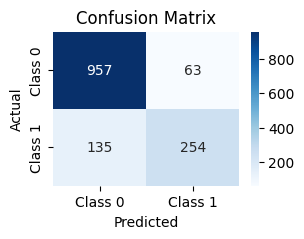

                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1020
           1       0.80      0.65      0.72       389

    accuracy                           0.86      1409
   macro avg       0.84      0.80      0.81      1409
weighted avg       0.86      0.86      0.85      1409

Train Score : 0.86
Test Score : 0.86
Accuracy_score : 0.86
F1 score : 0.85
balanced_accuracy:0.84



In [53]:
SVCmodel = SVC_cv.best_estimator_
SVCmodel.fit(X_train, Y_train)
SVCmodel_Pred = SVCmodel.predict(X_test)

cm=confusion_matrix(Y_test, SVCmodel_Pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('''                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |''')
print('\nClassification Report : \n', classification_report(Y_test, SVCmodel_Pred))
Train_Score=SVCmodel.score(X_train,Y_train).round(2)
Test_Score=SVCmodel.score(X_test,Y_test).round(2)
Accuracy_Score=accuracy_score(SVCmodel_Pred,Y_test).round(2)

F1_score=f1_score(Y_test, SVCmodel_Pred,  average='weighted').round(2)

balanced_accuracy = balanced_accuracy_score(SVCmodel_Pred,Y_test).round(2)

print("Train Score : {}\nTest Score : {}\nAccuracy_score : {}\nF1 score : {}\nbalanced_accuracy:{}\n".format(Train_Score,Test_Score,Accuracy_Score,F1_score,balanced_accuracy))

score['SVC']={"Train_Score":Train_Score,"Test_Score":Test_Score,"Accuracy_Score":Accuracy_Score,"F1_score":F1_score,"balanced_accuracy":balanced_accuracy}


## KNN

k-Nearest Neighbors (KNN):

How it works: KNN classifies a new data point based on the majority class of its k-nearest neighbors in the feature space. The "closeness" of neighbors is determined by a distance metric (e.g., Euclidean distance). KNN is a lazy learner, meaning it doesn't have a training phase; predictions are made when a new instance is encountered.

In [54]:
parameter={
    'n_neighbors': np.arange(10,31,10)
    }

KNNmodel = KNeighborsClassifier()
KNN_cv=GridSearchCV(KNNmodel,parameter,scoring='roc_auc',cv=5)
KNN_cv.fit(X_train,Y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",KNN_cv.best_estimator_)

print("\n The best parameters across ALL searched params:\n",KNN_cv.best_params_)



 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(n_neighbors=30)

 The best parameters across ALL searched params:
 {'n_neighbors': 30}


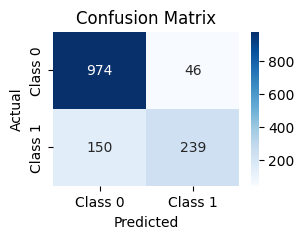

                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1020
           1       0.84      0.61      0.71       389

    accuracy                           0.86      1409
   macro avg       0.85      0.78      0.81      1409
weighted avg       0.86      0.86      0.85      1409

Train Score : 0.86
Test Score : 0.86
Accuracy_score : 0.86
F1 score : 0.85
balanced_accuracy:0.85



In [55]:
KNNmodel = KNN_cv.best_estimator_
KNNmodel.fit(X_train, Y_train)
KNNmodel_Pred = KNNmodel.predict(X_test)

cm=confusion_matrix(Y_test, KNNmodel_Pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('''                
                         | Predicted Negative  | Predicted Positive  |
         Actual Negative |        TN           |        FP           |
         Actual Positive |        FN           |        TP           |''')
print('\nClassification Report : \n', classification_report(Y_test, KNNmodel_Pred))
Train_Score=KNNmodel.score(X_train,Y_train).round(2)
Train_Score=KNNmodel.score(X_train,Y_train).round(2)
Test_Score=KNNmodel.score(X_test,Y_test).round(2)
Accuracy_Score=accuracy_score(KNNmodel_Pred,Y_test).round(2)

F1_score=f1_score(Y_test, KNNmodel_Pred, average='weighted').round(2)
balanced_accuracy = balanced_accuracy_score(KNNmodel_Pred,Y_test).round(2)

print("Train Score : {}\nTest Score : {}\nAccuracy_score : {}\nF1 score : {}\nbalanced_accuracy:{}\n".format(Train_Score,Test_Score,Accuracy_Score,F1_score,balanced_accuracy))

 
score['KNN']={"Train_Score":Train_Score,"Test_Score":Test_Score,"Accuracy_Score":Accuracy_Score,"F1_score":F1_score,"balanced_accuracy":balanced_accuracy}


## Summary

In [56]:
print("{:^13}|{:^13}| {:^15}|{:^13}|{:^13}".format('Model',"Train_Score",'Accuracy_Score','F1_Score','balanced_accuracy'))
print("-"*75)
for model, scores in score.items():
    
    print("{:^13}|{:^13}| {:^15}|{:^13}|{:^17}".format(model,scores['Train_Score'],scores['Accuracy_Score'],scores['F1_score'],scores['balanced_accuracy']))
    print("-"*75)

    


    Model    | Train_Score | Accuracy_Score |  F1_Score   |balanced_accuracy
---------------------------------------------------------------------------
     LR      |    0.86     |      0.86      |    0.86     |      0.83       
---------------------------------------------------------------------------
     DT      |    0.86     |      0.85      |    0.84     |      0.82       
---------------------------------------------------------------------------
     RFC     |    0.87     |      0.86      |    0.85     |      0.85       
---------------------------------------------------------------------------
     SVC     |    0.86     |      0.86      |    0.85     |      0.84       
---------------------------------------------------------------------------
     KNN     |    0.86     |      0.86      |    0.85     |      0.85       
---------------------------------------------------------------------------


Random Forest Classifier (RFC) , K-Nearest Neighbors (KNN) and Support Vector Classifier (SVC) are the top-performing models, with good accuracy,F1 score, and balanced accuracy. In terms of F1 score, Logistic Regression (LR) is the top-performing model but balanced accuracy is less compared to RFC and KNN.